In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')


In [5]:
df= pd.read_csv('data/galaxy.csv')

print(df_ad.shape)
df.head(5)

(1485, 9)


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [6]:
#결측치 확인
df.isna().sum()/len(df)

BuyItNow                0.000000
startprice              0.000000
carrier                 0.787205
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

In [8]:
#결측치 채우기
df = df.fillna('unknown')
df

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,unknown,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,unknown,unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,unknown,unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,unknown,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,unknown,Galaxy_S7,no description,96,2,0
1481,0,239.95,unknown,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,unknown,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,unknown,Midnight Black,Galaxy_S7,no description,92,2,1


In [ ]:
#블랙생삭 처리


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   object 
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 104.5+ KB


In [12]:
# BuyItNow 범주형 변수 처리
df['BuyItNow'] = df['BuyItNow'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   object 
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 104.5+ KB


In [13]:
# Black 종류를 하나로 통합시키기
#1. def  define(정의하다)**의 줄임말
#3. (x)함수가 받을 입력값(매개변수, parameter)여기서는 x라는 값을 하나 받겠다는 뜻
def black(x):
    if 'Black' in x:
        return 'Black'
    else:
        return x

black("OOO Black")

'Black'

In [14]:
df['color'] = df['color'].apply(black)
df['color']

0            White
1          unknown
2          unknown
3       Space Gray
4       Space Gray
           ...    
1480       unknown
1481         Black
1482    Space Gray
1483         Black
1484         Black
Name: color, Length: 1485, dtype: object

In [16]:
df['color'].value_counts()

color
unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: count, dtype: int64

# 디시젼트리 모델링

In [18]:
# 범주형 변수들 수치화(원핫인코딩)  #drop_first=True 쓸모없는 컬럼 삭제
df_dummies = pd.get_dummies(df, dtype='int', drop_first=True)

print(df_dummies.shape)
df_dummies

(1485, 20)


,startprice,charCountDescription,upperCaseDescription,sold,BuyItNow_1,carrier_Sprint/T-Mobile,carrier_Verizon,carrier_unknown,color_Gold,color_Space Gray,color_White,color_unknown,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
0,199.99,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,235.00,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,199.99,100,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1
3,175.00,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,100.00,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,89.50,96,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1481,239.95,97,5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1482,329.99,93,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1483,89.00,92,2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [19]:
#데이터 분리  
x=df_dummies.drop(columns=['sold'])  #sold팔렸다
y=df_dummies['sold']

In [21]:
# 학습, 테스트 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1188, 19)
(297, 19)
(1188,)
(297,)


In [25]:
# 디시젼트리 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()

In [30]:
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
# 테스트 데이터 예측
y_pred = dt.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.7474747474747475

In [34]:
# 혼동 행렬
confusion_matrix(y_test, y_pred)

array([[124,  37],
       [ 38,  98]])

# 최적의 max depth 찾기 (하이퍼파라미터 튜닝)

In [35]:
# 평가지표 상세 리포트
from sklearn.metrics import classification_report
print("\n3. Classification Report (상세 리포트):")
print(classification_report(y_test, y_pred))


3. Classification Report (상세 리포트):
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       161
           1       0.73      0.72      0.72       136

    accuracy                           0.75       297
   macro avg       0.75      0.75      0.75       297
weighted avg       0.75      0.75      0.75       297



In [41]:
# max_depth가 바뀔 때마다 accuracy(액큐러시/정확성)가 바뀔 수 있다. 
# #🔹 왜 중요한가?
# 📌 i = 1 (아주 얕은 나무)
# 단순함
# 과소적합(underfitting) 가능성 ↑
# 정확도 낮을 수 있음
# 📌 i = 3
# 조금 더 복잡
# 데이터 패턴을 더 잘 학습 또 많다고 정확하지도 않음

i = 3
dt = DecisionTreeClassifier(max_depth=i)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(i, round(accuracy_score(y_test, y_pred), 4))

3 0.8215


In [40]:
# i = 1
for i in range(1, 31):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    print(i, round(accuracy_score(y_test, y_pred), 4))

1 0.8182
2 0.8182
3 0.8215
4 0.8215
5 0.8182
6 0.8182
7 0.8013
8 0.7912
9 0.7946
10 0.7946
11 0.7475
12 0.7677
13 0.7542
14 0.7441
15 0.7508
16 0.7508
17 0.7576
18 0.734
19 0.7441
20 0.7374
21 0.7441
22 0.734
23 0.7407
24 0.7374
25 0.7441
26 0.7306
27 0.7609
28 0.7441
29 0.7407
30 0.7407


In [39]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [42]:
# 최적의 max_depth로 평가지표 확인
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       161
           1       0.88      0.71      0.78       136

    accuracy                           0.82       297
   macro avg       0.83      0.81      0.82       297
weighted avg       0.83      0.82      0.82       297



# graphviz 트리 시각화

In [44]:
from sklearn.tree import export_graphviz
import graphviz

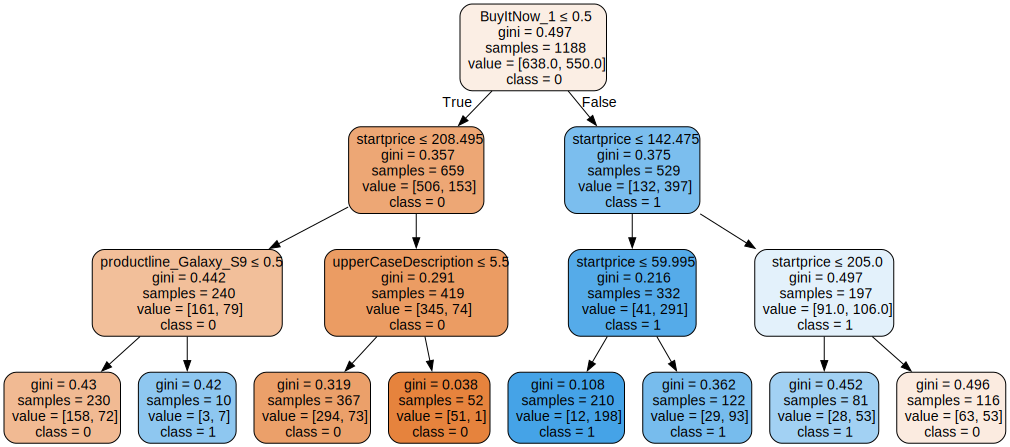

In [45]:
# 기본적인 graphviz 트리 시각화 코드(png 저장은 안됨)
dot_data = export_graphviz(
    dt,
    out_file=None,
    feature_names = x_train.columns,  # x(독립변수)
    class_names=['0', '1'],           # y(sold 여부)
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

# tree 시각화 png 저장

In [48]:
export_graphviz(
    dt,
    out_file="tree.dot",   # 이미지를 .dot 파일로 저장 
    feature_names=x_train.columns,
    class_names=['0', '1'],
    filled=True,
    rounded=True
)

In [47]:
#cd "C:\Users\Administrator\OneDrive\Desktop\python_jupyter notebook\machine_learning\지도학습\분류 classification"
#dot -Tpng tree.dot -o tree.png
#순서대로 아나콘다 프로프트에넣고 주피터에서 다시 저장하면됨
%pwd

'C:\\Users\\Administrator\\OneDrive\\Desktop\\python_jupyter notebook\\machine_learning\\지도학습\\분류 classification'

# plot_tree() 방법

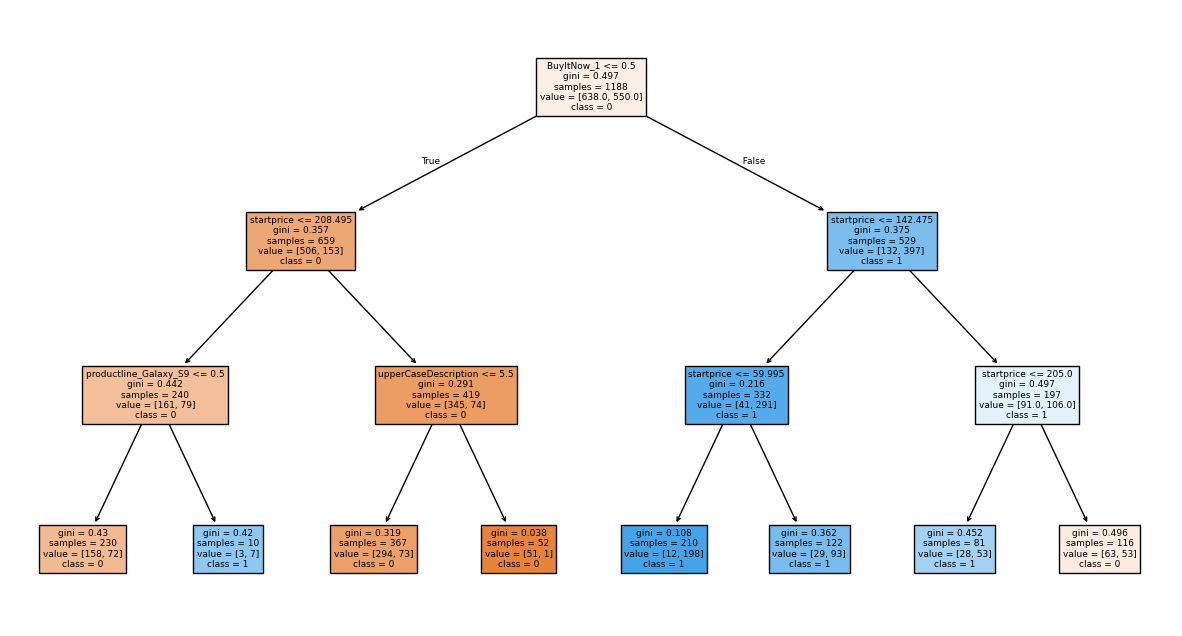

In [49]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(
    dt,
    feature_names=x_train.columns,
    class_names=['0','1'],
    filled=True
)
plt.show()

In [50]:
dt

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# 중요변수파악

In [51]:
x_train.columns

Index(['startprice', 'charCountDescription', 'upperCaseDescription',
       'BuyItNow_1', 'carrier_Sprint/T-Mobile', 'carrier_Verizon',
       'carrier_unknown', 'color_Gold', 'color_Space Gray', 'color_White',
       'color_unknown', 'productline_Galaxy_Note8', 'productline_Galaxy_Note9',
       'productline_Galaxy_S10', 'productline_Galaxy_S7',
       'productline_Galaxy_S8', 'productline_Galaxy_S9', 'productline_Unknown',
       'noDescription_no description'],
      dtype='object')

In [52]:
import pandas as pd

# 중요도 확인
importances = dt.feature_importances_
importances

array([0.21274164, 0.        , 0.01416311, 0.75927398, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01382127, 0.        , 0.        ])

In [53]:
# 데이터프레임으로 정리
feature_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

                         feature  importance
3                     BuyItNow_1    0.759274
0                     startprice    0.212742
2           upperCaseDescription    0.014163
16         productline_Galaxy_S9    0.013821
11      productline_Galaxy_Note8    0.000000
17           productline_Unknown    0.000000
15         productline_Galaxy_S8    0.000000
14         productline_Galaxy_S7    0.000000
13        productline_Galaxy_S10    0.000000
12      productline_Galaxy_Note9    0.000000
9                    color_White    0.000000
10                 color_unknown    0.000000
1           charCountDescription    0.000000
8               color_Space Gray    0.000000
7                     color_Gold    0.000000
6                carrier_unknown    0.000000
5                carrier_Verizon    0.000000
4        carrier_Sprint/T-Mobile    0.000000
18  noDescription_no description    0.000000


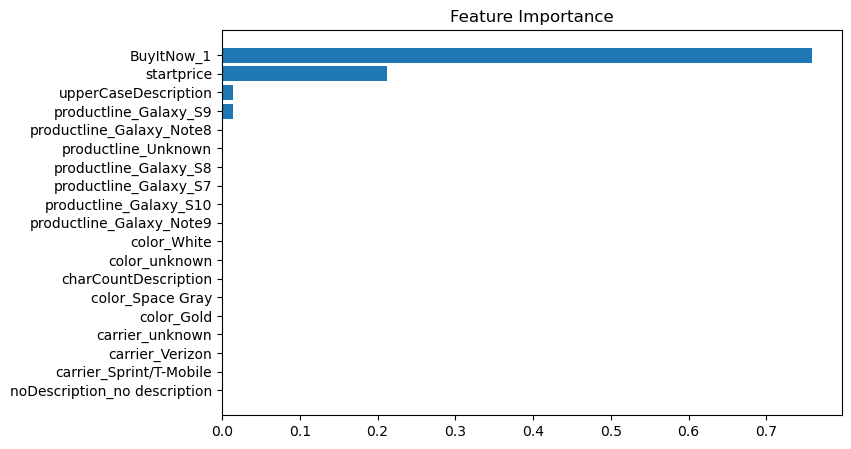

In [54]:
# 데이터프레임을 bar 차트 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
# 수평 바차트
plt.barh(feature_importance_df['feature'],
         feature_importance_df['importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.show()